# Exploring the Impact of Dsitribution Bin sizes for Recreating Intensity Dynamically
The Fredriksson paper from 2012 applies binning to bring down the number of photons to save and calculates output intensity by using those distributions. Exactly how much is the output impacted by the size of each bin? For a given model, we slowly change the bin size and look at the results. We compare it against the ground truth where each photon was accounted for individually and no distributions were used.

In [1]:
from inverse_modelling_tfo.data.generate_intensity import intensity_from_distribution 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib widget

In [3]:
# Load saved simulation files
base_path = Path('../data/distribution_bin_count_effect/')
simulated_bin_sizes = list(range(1, 15, 2)) + [20]   # Each correspond to a saved simulation file. This code does not simulate anything. 

all_files = [base_path / f'fa_1_wv_1_sa_0.1_ns_{x}_ms_5.csv' for x in simulated_bin_sizes]

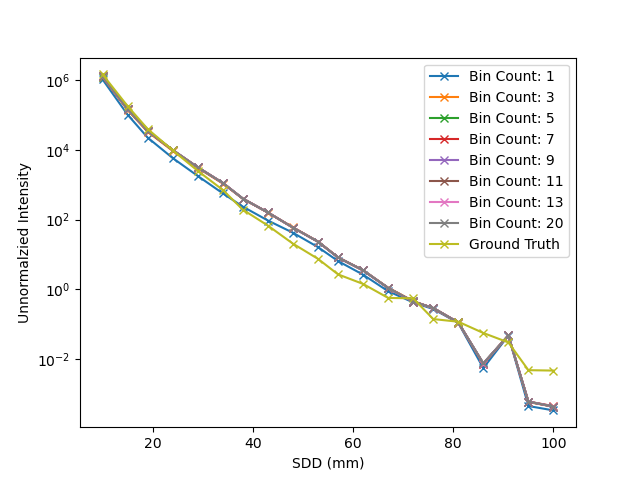

In [4]:
mu_map = {1: 0.0017, 2: 0.00085, 3: 0.0016, 4: 0.00125, 5: 0.00157, 6: 0.00175, 7: 0.015058259000000002, 8: 0.00187}

for bin_size, file in zip(simulated_bin_sizes, all_files):
    intensity_data = intensity_from_distribution(file, mu_map)
    plt.plot(intensity_data['SDD'], intensity_data['Intensity'], label=f'Bin Count: {bin_size}', marker='x')

ground_truth = pd.read_csv(base_path / f'fa_1_wv_1_sa_0.1_ns_1_ms_5_gt.csv')
plt.plot(ground_truth['X'] - 100, ground_truth['Total'], marker='x', label='Ground Truth')

plt.xlabel('SDD (mm)')
plt.ylabel('Unnormalzied Intensity')
plt.yscale('log')
plt.legend()
plt.show()